In [7]:
pip install tensorflow

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


6h infection

In [ ]:
import pandas as pd

In [ ]:
y  = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_target_in_6hour.csv')

In [ ]:
x = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_dataset_in_6hour.csv')

In [ ]:
y

,stay_id,los
0,30014984,2.371771
1,30032239,0.410671
2,30033143,3.712685
3,30034369,2.817083
4,30041148,0.841644
...,...,...
1856,39964475,1.104896
1857,39974319,0.906366
1858,39992167,10.048414
1859,39992901,0.447454


In [ ]:
x

,time_bin,stay_id,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC,gender,anchor_age
0,0,30014984,96.75,107.5,53.5,139.5,97.0,38.333333,25.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
1,1,30014984,93.00,96.0,54.0,139.5,97.0,37.166667,19.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
2,2,30014984,82.00,103.0,56.0,155.0,97.0,37.166667,22.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
3,3,30014984,79.00,113.0,62.0,155.0,97.0,37.166667,20.0,7.23,2.0,1.0,4.0,2.1,25.2,1,44
4,4,30014984,81.00,103.0,56.0,155.0,97.0,37.000000,20.0,7.23,2.0,1.0,4.0,2.1,25.2,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,1,39996123,72.00,81.0,48.0,129.0,96.0,36.500000,12.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
11162,2,39996123,70.00,91.0,51.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
11163,3,39996123,63.00,81.0,54.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
11164,4,39996123,62.00,117.0,48.0,129.0,97.0,36.500000,10.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91


12h infection


Training SimpleRNN_basic...
Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 26.4852 - mae: 3.9724 - val_loss: 9.9905 - val_mae: 2.3912
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1885 - mae: 2.4471 - val_loss: 9.2782 - val_mae: 2.3174
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5537 - mae: 2.3873 - val_loss: 9.1390 - val_mae: 2.2969
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1780 - mae: 2.3342 - val_loss: 8.8870 - val_mae: 2.2128
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7975 - mae: 2.2695 - val_loss: 8.7960 - val_mae: 2.2022
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6785 - mae: 2.2711 - val_loss: 9.0133 - val_mae: 2.2648
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4411 - mae: 2.2323 - val_loss: 9.6752 - val_mae: 2.5009
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6751 - mae: 2.2595 - val_loss: 9.0002 - val_mae: 2.2234
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s

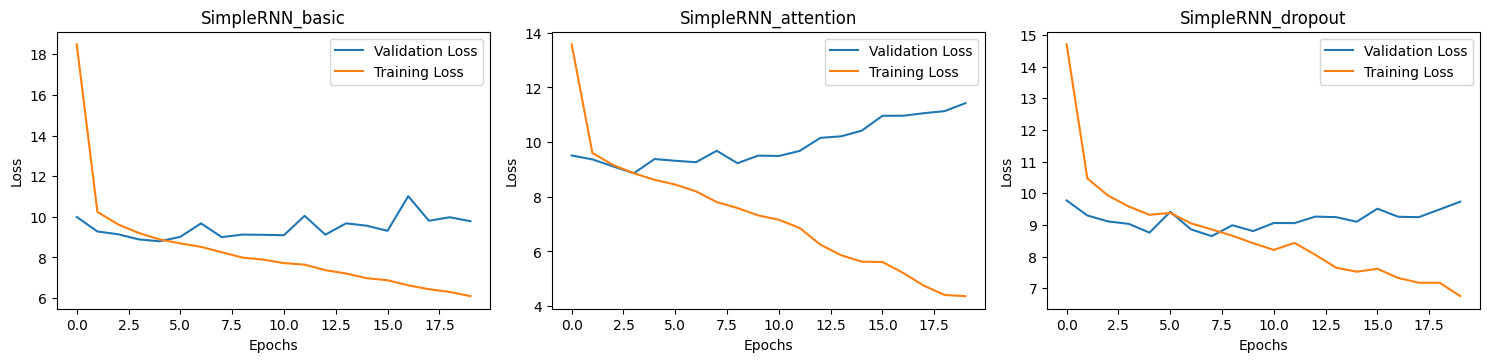

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_dataset_in_12hour.csv')
target = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_target_in_12hour.csv')
target = target[['los']]
# stay_id와 los 연결
stay_ids = dataset['stay_id'].unique()
target['stay_id'] = stay_ids
merged_dataset = pd.merge(dataset, target[['stay_id', 'los']], on='stay_id', how='inner')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los", "time_bin"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 12
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)




# 입력 데이터 형식
sequence_length = X_train.shape[1]
feature_dim = X_train.shape[2]
inputs = Input(shape=(sequence_length, feature_dim))

# 모델 생성 함수
def create_basic_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

def create_attention_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=True)(inputs)
    query = Dense(32)(rnn_out)  # Attention 크기 감소
    key = Dense(32)(rnn_out)
    value = Dense(32)(rnn_out)
    attention_out = Attention()([query, key, value])
    attention_out = GlobalAveragePooling1D()(attention_out)
    output = Dense(1)(attention_out)
    return Model(inputs=inputs, outputs=output)

def create_dropout_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    rnn_out = Dropout(0.3)(rnn_out)  # Dropout 비율 증가
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

# 모델 정의 및 컴파일
rnn_layer_types = {'SimpleRNN': SimpleRNN}
models = {}

for layer_name, layer_type in rnn_layer_types.items():
    models[f"{layer_name}_basic"] = create_basic_model(layer_type)
    models[f"{layer_name}_attention"] = create_attention_model(layer_type)
    models[f"{layer_name}_dropout"] = create_dropout_model(layer_type)

for model in models.values():
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 평가 함수
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    y_test = y_test.flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


# 모델 학습 및 평가
histories = {}
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    histories[model_name] = model.fit(
        X_train, y_train,
        epochs=20,  # Epoch 증가
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )
    # 모델 평가
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 평가 결과 출력
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.reset_index(inplace=True)
evaluation_df.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2']
print("\nEvaluation Results:")
print(evaluation_df)

# 평가 결과 시각화
plt.figure(figsize=(15, 10))
for i, (model_name, history) in enumerate(histories.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


12h infection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
dataset = pd.read_csv('infection_dataset_in_12hour.csv')
target = pd.read_csv('infection_target_in_12hour.csv')
target = target[['los']]
# stay_id와 los 연결
stay_ids = dataset['stay_id'].unique()
target['stay_id'] = stay_ids
merged_dataset = pd.merge(dataset, target[['stay_id', 'los']], on='stay_id', how='inner')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los", "time_bin"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 12
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# 입력 데이터 형식
sequence_length = X_train.shape[1]
feature_dim = X_train.shape[2]
inputs = Input(shape=(sequence_length, feature_dim))

# 모델 생성 함수
def create_basic_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

def create_attention_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=True)(inputs)
    query = Dense(32)(rnn_out)  # Attention 크기 감소
    key = Dense(32)(rnn_out)
    value = Dense(32)(rnn_out)
    attention_out = Attention()([query, key, value])
    attention_out = GlobalAveragePooling1D()(attention_out)
    output = Dense(1)(attention_out)
    return Model(inputs=inputs, outputs=output)

def create_dropout_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    rnn_out = Dropout(0.3)(rnn_out)  # Dropout 비율 증가
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

# 모델 정의 및 컴파일
rnn_layer_types = {'SimpleRNN': SimpleRNN, 'LSTM': LSTM, 'GRU': GRU}
models = {}

for layer_name, layer_type in rnn_layer_types.items():
    models[f"{layer_name}_basic"] = create_basic_model(layer_type)
    models[f"{layer_name}_attention"] = create_attention_model(layer_type)
    models[f"{layer_name}_dropout"] = create_dropout_model(layer_type)

for model in models.values():
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 평가 함수
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    y_test = y_test.flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


# 모델 학습 및 평가
histories = {}
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    histories[model_name] = model.fit(
        X_train, y_train,
        epochs=20,  # Epoch 증가
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )
    # 모델 평가
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 평가 결과 출력
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.reset_index(inplace=True)
evaluation_df.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2']
print("\nEvaluation Results:")
print(evaluation_df)

# 평가 결과 시각화
plt.figure(figsize=(15, 10))
for i, (model_name, history) in enumerate(histories.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'infection_dataset_in_12hour.csv'

6h circulatory

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_dataset_in_6hour.csv')
target = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_target_in_6hour.csv')
# stay_id와 los 연결
# dataset과 target의 stay_id 확인
dataset_stay_ids = dataset['stay_id'].unique()
target_stay_ids = target['stay_id'].unique()

# dataset의 stay_id가 target에 모두 포함되는지 확인
missing_stay_ids = set(dataset_stay_ids) - set(target_stay_ids)
print(f"Missing stay_ids in target: {len(missing_stay_ids)}")

# stay_id를 기준으로 병합
merged_dataset = pd.merge(dataset, target, on='stay_id', how='inner')

# 병합된 데이터 확인
print(f"Merged dataset shape: {merged_dataset.shape}")

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los", "time_bin"])  # stay_id와 time_bin 제거
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 6
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# 입력 데이터 형식
sequence_length = X_train.shape[1]
feature_dim = X_train.shape[2]
inputs = Input(shape=(sequence_length, feature_dim))

# 모델 생성 함수
def create_basic_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

def create_attention_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=True)(inputs)
    query = Dense(32)(rnn_out)  # Attention 크기 감소
    key = Dense(32)(rnn_out)
    value = Dense(32)(rnn_out)
    attention_out = Attention()([query, key, value])
    attention_out = GlobalAveragePooling1D()(attention_out)
    output = Dense(1)(attention_out)
    return Model(inputs=inputs, outputs=output)

def create_dropout_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    rnn_out = Dropout(0.3)(rnn_out)  # Dropout 비율 증가
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

# 모델 정의 및 컴파일
rnn_layer_types = {'SimpleRNN': SimpleRNN}
models = {}

for layer_name, layer_type in rnn_layer_types.items():
    models[f"{layer_name}_basic"] = create_basic_model(layer_type)
    models[f"{layer_name}_attention"] = create_attention_model(layer_type)
    models[f"{layer_name}_dropout"] = create_dropout_model(layer_type)

for model in models.values():
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 평가 함수
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    y_test = y_test.flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


# 모델 학습 및 평가
histories = {}
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    histories[model_name] = model.fit(
        X_train, y_train,
        epochs=50,  # Epoch 증가
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )
    # 모델 평가
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 평가 결과 출력
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.reset_index(inplace=True)
evaluation_df.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2']
print("\nEvaluation Results:")
print(evaluation_df)

# 평가 결과 시각화
plt.figure(figsize=(15, 10))
for i, (model_name, history) in enumerate(histories.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


Missing stay_ids in target: 0
Merged dataset shape: (18528, 18)

Training SimpleRNN_basic...
Epoch 1/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17.1206 - mae: 3.0631 - val_loss: 10.1832 - val_mae: 2.4910
Epoch 2/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6659 - mae: 2.3989 - val_loss: 9.2670 - val_mae: 2.3908
Epoch 3/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.4642 - mae: 2.2211 - val_loss: 8.1776 - val_mae: 2.1654
Epoch 4/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4027 - mae: 2.0272 - val_loss: 7.4930 - val_mae: 2.0169
Epoch 5/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5364 - mae: 1.8941 - val_loss: 7.0880 - val_mae: 1.9030
Epoch 6/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2212 - mae: 1.8333 - val_loss: 6.6918 - val_mae: 1.8326
Epoch 7/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5893 - mae: 1.7337 - val_loss: 6.6062 - val_mae: 1.8390
Epoch 8/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9503 - mae: 1.619

12h circulatory

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_dataset_in_12hour.csv')
target = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_target_in_12hour.csv')

# stay_id와 los 연결
# dataset과 target의 stay_id 확인
dataset_stay_ids = dataset['stay_id'].unique()
target_stay_ids = target['stay_id'].unique()

# dataset의 stay_id가 target에 모두 포함되는지 확인
missing_stay_ids = set(dataset_stay_ids) - set(target_stay_ids)
print(f"Missing stay_ids in target: {len(missing_stay_ids)}")

# stay_id를 기준으로 병합
merged_dataset = pd.merge(dataset, target, on='stay_id', how='inner')

# 병합된 데이터 확인
print(f"Merged dataset shape: {merged_dataset.shape}")

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los", "time_bin"])  # stay_id와 time_bin 제거
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 12
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# 입력 데이터 형식
sequence_length = X_train.shape[1]
feature_dim = X_train.shape[2]
inputs = Input(shape=(sequence_length, feature_dim))

# 모델 생성 함수
def create_basic_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

def create_attention_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=True)(inputs)
    query = Dense(32)(rnn_out)  # Attention 크기 감소
    key = Dense(32)(rnn_out)
    value = Dense(32)(rnn_out)
    attention_out = Attention()([query, key, value])
    attention_out = GlobalAveragePooling1D()(attention_out)
    output = Dense(1)(attention_out)
    return Model(inputs=inputs, outputs=output)

def create_dropout_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    rnn_out = Dropout(0.3)(rnn_out)  # Dropout 비율 증가
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

# 모델 정의 및 컴파일
rnn_layer_types = {'SimpleRNN': SimpleRNN, 'LSTM': LSTM, 'GRU': GRU}
models = {}

for layer_name, layer_type in rnn_layer_types.items():
    models[f"{layer_name}_basic"] = create_basic_model(layer_type)
    models[f"{layer_name}_attention"] = create_attention_model(layer_type)
    models[f"{layer_name}_dropout"] = create_dropout_model(layer_type)

for model in models.values():
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 평가 함수
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    y_test = y_test.flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


# 모델 학습 및 평가
histories = {}
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    histories[model_name] = model.fit(
        X_train, y_train,
        epochs=20,  # Epoch 증가
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )
    # 모델 평가
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 평가 결과 출력
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.reset_index(inplace=True)
evaluation_df.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2']
print("\nEvaluation Results:")
print(evaluation_df)

# 평가 결과 시각화
plt.figure(figsize=(15, 10))
for i, (model_name, history) in enumerate(histories.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


Missing stay_ids in target: 0
Merged dataset shape: (30444, 18)

Training SimpleRNN_basic...
Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 23.1908 - mae: 3.6294 - val_loss: 10.7410 - val_mae: 2.5526
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9692 - mae: 2.4263 - val_loss: 9.3554 - val_mae: 2.3238
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0971 - mae: 2.4262 - val_loss: 9.0006 - val_mae: 2.3235
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9948 - mae: 2.3539 - val_loss: 8.8106 - val_mae: 2.1293
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5535 - mae: 2.1900 - val_loss: 8.6887 - val_mae: 2.2380
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4017 - mae: 2.2088 - val_loss: 8.6503 - val_mae: 2.1832
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2909 - mae: 2.1982 - val_loss: 8.5090 - val_mae: 2.1870
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0961 - mae: 2.1809 - val_loss: 

KeyboardInterrupt: 